In [14]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 3)
np.set_printoptions(linewidth=1000)

In [15]:
model_info_df = pd.read_csv('../pretrained_models/Sei/Sei_info.csv')
model_info_df

,cell_type,assay,ID,part
0,HeLa_Epithelium_Cervix,BTAF1,ID:1,0
1,H9_Embryonic_Stem_Cell_Embryo,EOMES,ID:1006,0
2,H9_Embryonic_Stem_Cell_Embryo,EP300,ID:1007,0
3,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1010,0
4,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1011,0
...,...,...,...,...
21902,WERI-Rb-1,CTCF,ENCODE,0
21903,WERI-Rb-1,DNase,ENCODE,0
21904,WI-38,CTCF,ENCODE,0
21905,WI-38 (4OHTAM_20nM_72hr),DNase,ENCODE,0


In [16]:
counter = Counter(model_info_df['assay'])
for a in counter.most_common(10):
    print(a)

('H3K27ac', 2458)
('H3K4me3', 2350)
('DNase', 1408)
('H3K4me1', 1206)
('POLR2A', 1003)
('ATAC-seq', 964)
('H3K27me3', 896)
('CTCF', 595)
('H3K9me3', 522)
('H3K36me3', 511)


In [17]:
counter = Counter(model_info_df['cell_type'])
for a in counter.most_common(10):
    print(a)

('K562_Erythroblast_Bone_Marrow', 1018)
('MCF-7_Epithelium_Breast', 809)
('A549_Epithelium_Lung', 512)
('T_Lymphocyte_Blood', 499)
('HEK293_Epithelium_Embryonic_Kidney', 460)
('LNCaP_Epithelium_Prostate', 404)
('H1_Embryonic_Stem_Cell_Embryo', 396)
('Monocyte_Blood', 356)
('HeLa_Epithelium_Cervix', 339)
('GM12878_B_Lymphocyte_Blood', 327)


In [49]:
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

# # 定义细胞所有可能的名字
cell_names_dict = {
    'HepG2': [
        r"HepG2",
        r"Hep-G2",
        ],
    'K562': [
        r"K562",
        r"K-562",
    ],
    'SK-N-SH': [
        r"SK-N-SH",
        r"SKNSH",
        r"SKN-SH",
        r"SK-NSH",
        r"neuroblastoma",
    ],
    'A549': [
        r"A549",
        r"A-549",
    ],
    'HCT116': [
        r"HCT116",
        r"HCT-116",
    ],
}


for cell_type in cell_names_dict:
    cell_names = cell_names_dict[cell_type]
    pattern = re.compile("|".join(cell_names), re.IGNORECASE) # 不区分大小写
    matched_indice = [i for i in range(len(model_info_df))
                      if (pattern.search(model_info_df['cell_type'][i])) and (model_info_df['assay'][i] in assays)]

    counter = Counter(model_info_df.iloc[matched_indice]['cell_type'])
    for a in counter.most_common():
        print(a)
    print()

('HepG2_Epithelium_Liver', 42)
('HepG2_Hepatocellular_Carcinoma', 7)
('HepG2', 5)

('K562_Erythroblast_Bone_Marrow', 284)
('K562', 13)
('K562_Leukemia', 8)
('K562_Leukemia_Bone', 2)
('K562_human_erythroleukemic_cell_line', 1)

('Neuroblastoma_cell', 16)
('SHEP-21N_Neuroblastoma_cell_Bone_Marrow', 12)
('SK-N-SH_RA_Neuron_Brain', 9)
('SK-N-SH_Neuroblastoma_cell_Brain', 8)
('IMR-5_75_Neuroblastoma_cell', 4)
('SH-SY5Y_Neuroblastoma_cell', 4)
('Neuroblastoma_patient_cells', 3)
('SK-N-SH_RA', 3)
('BE2-C_Neuroblastoma_cell', 2)
('LAN-1_Neuroblastoma_cell', 2)
('CLB-Ga_Neuroblastoma_cell', 2)
('NB-1643_Neuroblastoma_cell', 1)
('SK-N-BE(2)c_Neuroblastoma_cell', 1)
('SJNB-8_Neuroblastoma_cell', 1)
('SK-N-DZ_Neuroblastoma_cell', 1)
('IMR-32_Neuroblastoma_cell', 1)
('SK-N-AS_Neuroblastoma_cell', 1)
('SJNB-6_Neuroblastoma_cell', 1)
('EBC-1_Neuroblastoma_cell', 1)
('KELLY_Neuroblastoma_cell', 1)
('CHP-212_Neuroblastoma_cell', 1)
('GI-CA-N_Neuroblastoma_cell', 1)
('SH-EP_Neuroblastoma_cell', 1)
('SJN

In [46]:
# # 定义细胞所有可能的名字
cell_names_dict = {
    'HepG2'  : ["HepG2_Epithelium_Liver", "HepG2_Hepatocellular_Carcinoma", "HepG2"],
    'K562'   : ["K562_Erythroblast_Bone_Marrow", "K562"],
    'SK-N-SH': ["SK-N-SH_RA_Neuron_Brain", "SK-N-SH_Neuroblastoma_cell_Brain", "SK-N-SH_RA"],
    'A549'   : ["A549_Epithelium_Lung", "A549"],
    'HCT116' : ["HCT-116_Colon", "HCT-116_HCT116", "HCT-116"],
}

cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
index_list = []
index_df = pd.DataFrame(index=cell_types, columns=assays)

for cell_type in cell_types:
    for assay in assays:
        indice = []
        for cell_name in cell_names_dict[cell_type]:
            mask = (model_info_df['cell_type'].str.upper() == cell_name.upper()) & (model_info_df['assay'] == assay) # 不区分大小写
            index = model_info_df[mask].index.tolist()
            indice.extend(index)

        index_df.loc[cell_type, assay] = indice
        index_list.extend(indice)

index_df_len = index_df.map(len)
index_df_len

,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF
HepG2,9,4,8,2,2,9,3,17
K562,58,10,91,21,34,51,5,27
SK-N-SH,4,0,4,0,1,3,1,7
A549,4,37,45,27,3,53,1,10
HCT116,7,18,39,1,1,49,4,14


In [29]:
MPRA_df = pd.read_csv('../data/SirajMPRA/SirajMPRA_562654.csv')
print(MPRA_df.shape)

(562654, 15)


In [30]:
MPRA_df

,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,alt,start,end,585605_index
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.668,-0.704,0.539,0.159,True,chr1,14677,G,A,14577,14777,0
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.416,0.554,0.442,-0.288,False,chr1,14677,G,A,14577,14777,1
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.270,-0.391,0.752,1.100,True,chr1,63697,T,C,63597,63797,2
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.152,-0.659,0.205,1.051,False,chr1,63697,T,C,63597,63797,3
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211,-0.007,0.499,0.258,True,chr1,64764,C,T,64664,64864,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562649,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.616,1.927,0.798,1.035,False,chrX,155233098,T,C,155232998,155233198,585600
562650,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.410,0.556,2.843,1.496,True,chrX,155233794,A,G,155233694,155233894,585601
562651,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.895,-0.073,1.974,0.795,False,chrX,155233794,A,G,155233694,155233894,585602
562652,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312,0.166,-0.041,0.444,True,chrX,155234730,T,C,155234630,155234830,585603


In [9]:
# predicted_df = np.load('outputs/SirajMPRA_Enformer_no_padding.npy').mean(1)
# predicted_df = np.load('outputs/SirajMPRA_Enformer_zero_padding.npy').mean(1)
predicted_array = np.load('../pretrained_models/Sei/model_info_Siraj_pred.npy')
predicted_array = predicted_array[MPRA_df['585605_index']]
print(predicted_array.shape)

(585605, 21907)


In [13]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

predicted_matrix = np.zeros((len(predicted_array), len(cell_types), len(assays)))
print(predicted_matrix.shape)

(562654, 5, 8)


In [38]:
# average every channel

pearson_array = np.zeros((len(cell_types), len(assays)))
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = index_df.iloc[i, j]
        if indice:
            # predicted_feature = predicted_array[:, indice].mean(1)
            predicted_feature = logit(predicted_array[:, indice]).mean(1)
            true_label = MPRA_df[cell_type]
            r = pearson(predicted_feature, true_label)
            predicted_matrix[:, i, j] = predicted_feature
            pearson_array[i, j] = r

print(pearson_array)
# print(predicted_matrix.mean(-1))

[[ 0.44254926  0.35124665  0.46876764 -0.01119045  0.1974741   0.42731662  0.28557086  0.3502348 ]
 [ 0.49865128  0.38841764  0.45095817  0.28509025  0.18742642  0.44374257  0.32058434  0.36307116]
 [ 0.36796093  0.          0.46198413  0.          0.23614639  0.46956792  0.22345531  0.31575068]
 [ 0.34801156  0.30376153  0.36150358  0.23681118  0.08004334  0.36257705  0.26078315  0.24738493]
 [ 0.42579087  0.43542281  0.44558834 -0.05709654  0.2429226   0.45165317  0.2953102   0.33215694]]


In [50]:
cell_names_dict = {
    'HepG2'  : ["HepG2_Epithelium_Liver"],
    'K562'   : ["K562_Erythroblast_Bone_Marrow"],
    'SK-N-SH': ["SK-N-SH_RA_Neuron_Brain", "SK-N-SH_Neuroblastoma_cell_Brain", "SK-N-SH_RA"],
    'A549'   : ["A549_Epithelium_Lung"],
    'HCT116' : ["HCT-116_Colon", "HCT-116_HCT116"],
}


cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
index_list = []
index_df = pd.DataFrame(index=cell_types, columns=assays)

for cell_type in cell_types:
    for assay in assays:
        indice = []
        for cell_name in cell_names_dict[cell_type]:
            mask = (model_info_df['cell_type'].str.upper() == cell_name.upper()) & (model_info_df['assay'] == assay) # 不区分大小写
            index = model_info_df[mask].index.tolist()
            indice.extend(index)

        index_df.loc[cell_type, assay] = indice
        index_list.extend(indice)

index_df_len = index_df.map(len)
print(index_df_len)


pearson_array = np.zeros((len(cell_types), len(assays)))
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = index_df.iloc[i, j]
        if indice:
            predicted_feature = logit(predicted_array[:, indice]).mean(1)
            true_label = MPRA_df[cell_type]
            r = pearson(predicted_feature, true_label)
            predicted_matrix[:, i, j] = predicted_feature
            pearson_array[i, j] = r

print(pearson_array)

         DNase  H3K4me1  H3K4me3  H3K9me3  H3K27me3  H3K27ac  H3K36me3  CTCF
HepG2        7        3        7        1         1        8         2    13
K562        56        9       90       20        33       50         4    22
SK-N-SH      4        0        4        0         1        3         1     7
A549         3       37       45       27         3       53         1     8
HCT116       6       17       39        1         1       49         4    13
[[ 0.44501117  0.35262998  0.4669199   0.01559426  0.25533614  0.42726857  0.32486144  0.34154748]
 [ 0.49956726  0.39293285  0.45083403  0.28560455  0.19100953  0.44362985  0.34534047  0.35687516]
 [ 0.36796093  0.          0.46198413  0.          0.23614639  0.46956792  0.22345531  0.31575068]
 [ 0.34516022  0.30376153  0.36150358  0.23681118  0.08004334  0.36257705  0.26078315  0.23344785]
 [ 0.42371714  0.43739645  0.44558834 -0.05709654  0.2429226   0.45165317  0.2953102   0.3294118 ]]


In [43]:
# # average every channel

# pearson_array = np.zeros((len(cell_types), len(assays)))
# for i, cell_type in enumerate(cell_types):
#     for j, assay in enumerate(assays):
#         print(cell_type, assay)
#         indice = index_df.iloc[i, j]
#         if indice:
#             for k in indice:
#                 predicted_feature = logit(predicted_array[:, k])
#                 print(predicted_feature.mean())
# #                 true_label = MPRA_df[cell_type]
# #                 r = pearson(predicted_feature, true_label)
# #                 predicted_matrix[:, i, j] = predicted_feature
# #                 pearson_array[i, j] = r

# # print(pearson_array)
# # print(predicted_matrix.mean(-1))

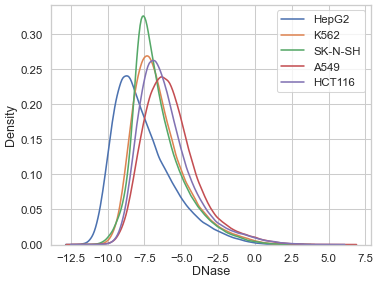

/tmp/ipykernel_52479/3148867045.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


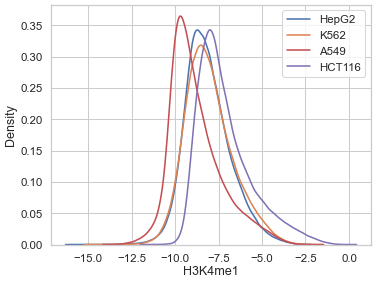

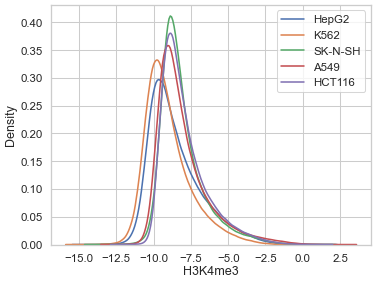

/tmp/ipykernel_52479/3148867045.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


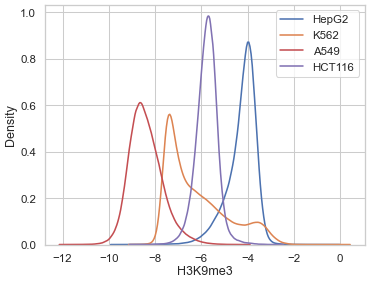

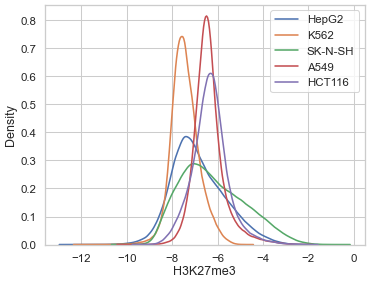

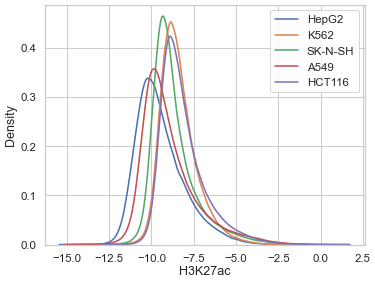

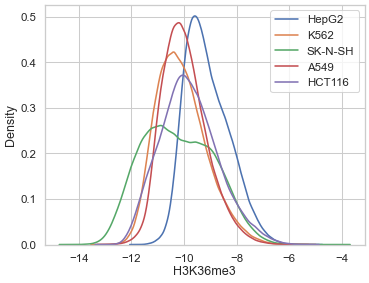

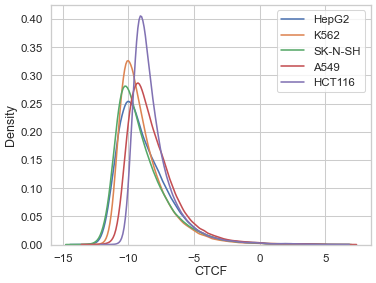

In [40]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for i, cell_type in enumerate(cell_types):
        x = predicted_matrix[:, i, j]
        sns.kdeplot(x, label=cell_type)
    plt.xlabel(f'{assay}')
    plt.legend()
    plt.show()